Economic Impact Code

Load all necessary packages

In [11]:
library(FitAR)
library(forecast)
library(ggplot2)
library(tidyverse)
library(FitAR)
library(glmnet)
library(leaps)
library(caret)
library(forcasts)
library(tidyverse)
library(dplyr)
library(GGally)
library(broom)

Loading required package: lattice

Loading required package: leaps

Loading required package: ltsa

Loading required package: bestglm

Warning message:
“package ‘forecast’ was built under R version 4.0.5”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:FitAR’:

    BoxCox


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-2


Attaching package: ‘caret’


The following object is ma

ERROR: Error in library(forcasts): there is no package called ‘forcasts’


Import, Tidy and Check Inflation Data

In [9]:
data<-read.csv("Economic Impact Data/Inflation.csv") 
colnames(data)<-c("Time","InflationRate")
head(data)

data$InflationRate <- as.numeric(data$InflationRate)
tail(data)

,Time,InflationRate
,<int>,<dbl>
1,1991,9.73
2,1992,8.04
3,1993,7.00
4,1994,4.80
5,1995,3.35
6,1996,3.52


,Time,InflationRate
,<int>,<dbl>
25,2015,1.30
26,2016,1.23
27,2017,3.29
28,2018,4.23
29,2019,3.00
30,2020,1.32


Create a Time Series

In [12]:
cpi <- ts(data$InflationRate, frequency = 1, start = c(1991))

Make a dataframe in order to plot CPI and return a statistical summary

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



date,cpi
<date>,<dbl>
1991-12-01,9.73
1992-12-01,8.04
1993-12-01,7.00
2008-12-01,6.41
1997-12-01,5.09
1994-12-01,4.80
2014-12-01,4.79
2018-12-01,4.23
2007-12-01,4.03


date,cpi
<date>,<dbl>
2009-12-01,-1.42
2016-12-01,1.23
2015-12-01,1.30
2020-12-01,1.32
2002-12-01,1.37
2010-12-01,1.38
1999-12-01,1.79
2003-12-01,2.28
1998-12-01,2.58


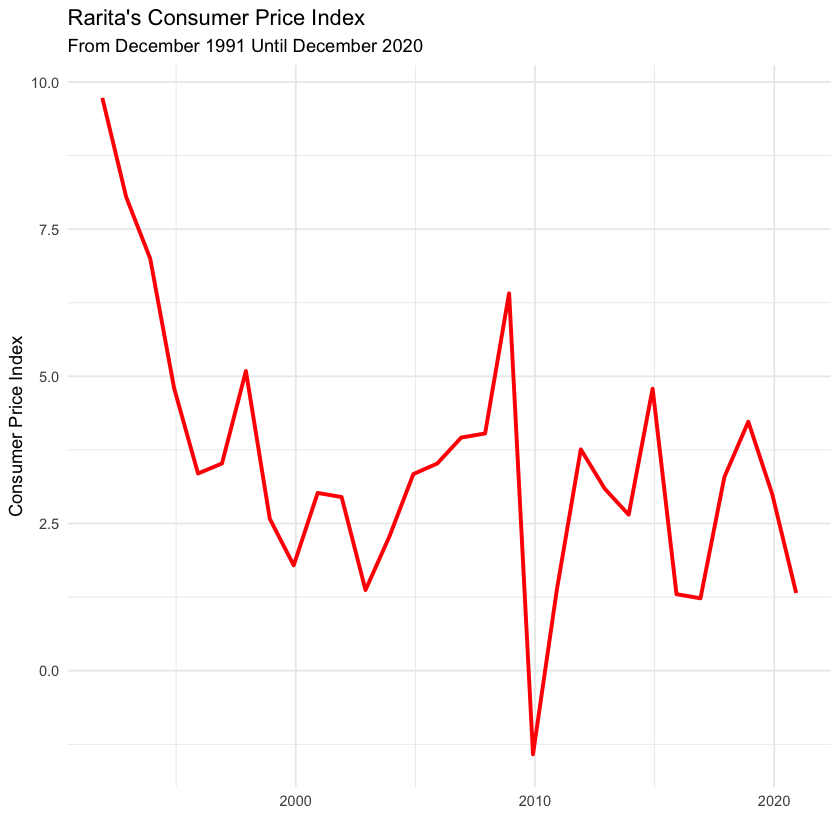

In [14]:
tidy_data <- data.frame(
  date = seq(as.Date("1991-12-01"), as.Date("2020-12-01"), by = "year"),
  cpi = cpi
)
tidy_data

p <- ggplot(tidy_data, aes(x=date, y=cpi)) +
  geom_line(color="red", size=1.1) +
  theme_minimal() +
  xlab("") +
  ylab("Consumer Price Index") +
  ggtitle("Rarita's Consumer Price Index", subtitle = "From December 1991 Until December 2020")
p

tidy_data %>%
  arrange(desc(cpi))
tidy_data %>%
  arrange(cpi)

Plot ACF anf PACF, then fit the data to a ARIMA(0,1,1) model

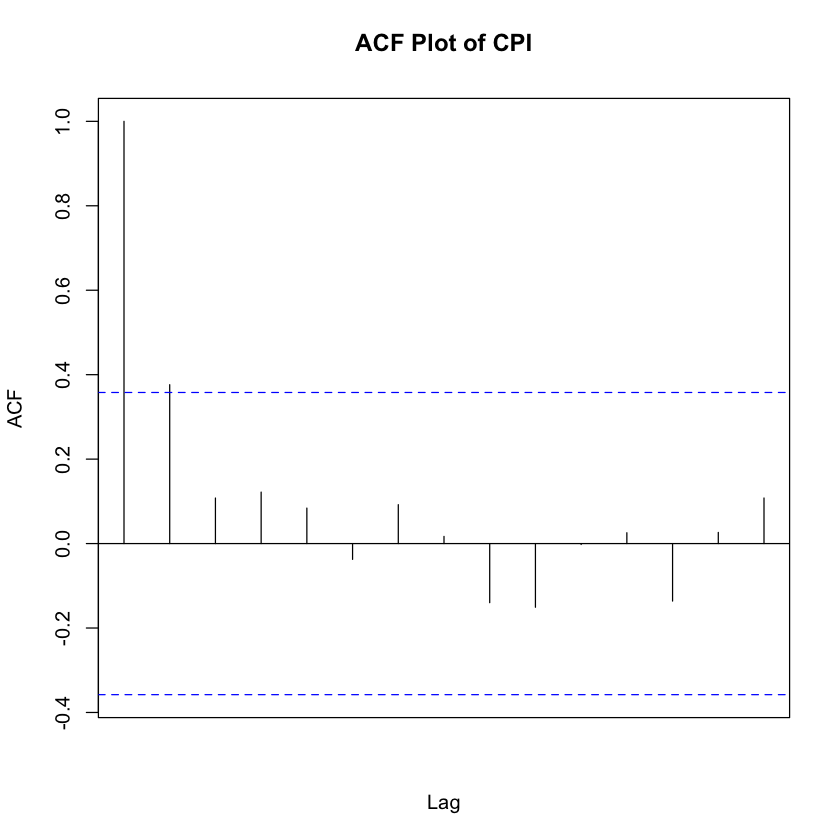

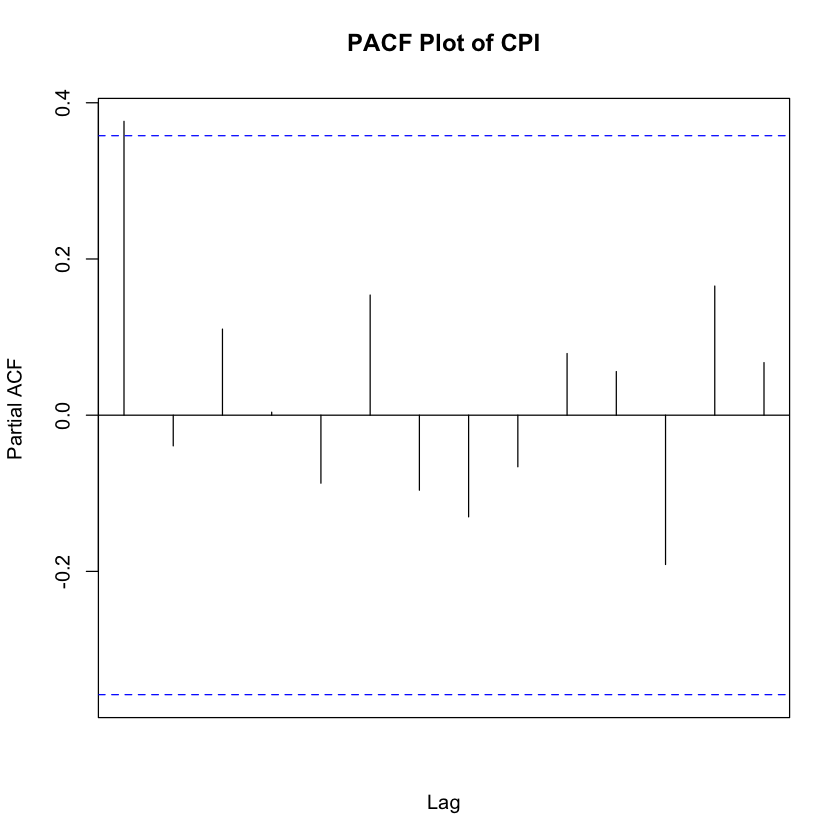

In [15]:
acf(cpi, plot = T, main = "ACF Plot of CPI", xaxt="n")
pacf(cpi, plot = T, main = "PACF Plot of CPI", xaxt="n")

fit_2<-auto.arima(cpi)

Plot fitted model

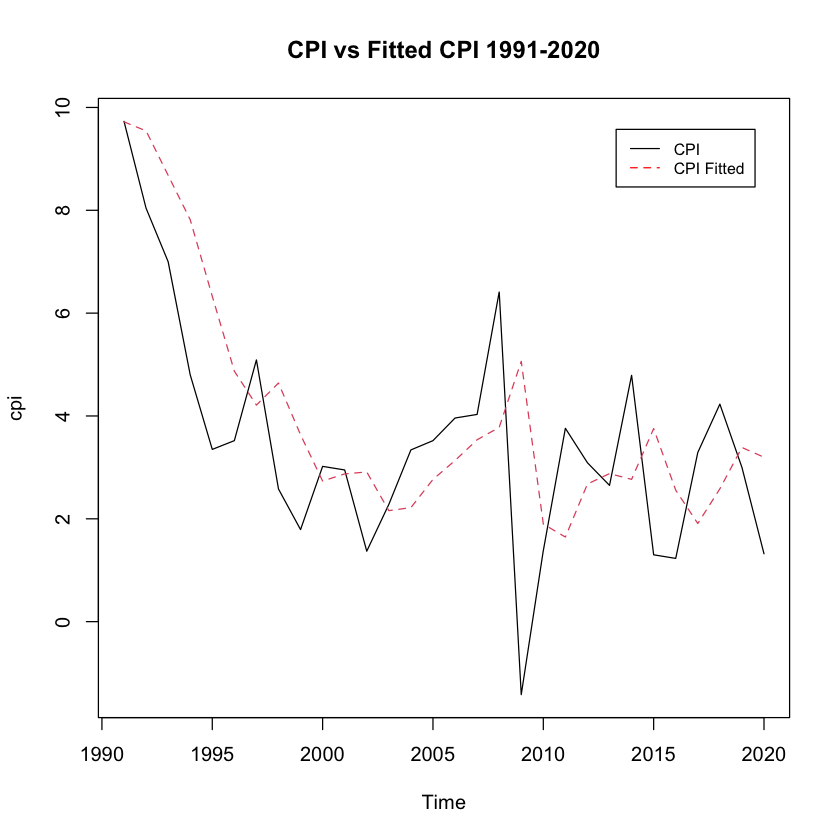

In [16]:
residuals_2 <- residuals(fit_2)
fit_2_fitted <- cpi - residuals_2
ts.plot(cpi, main="CPI vs Fitted CPI 1991-2020")
legend(x="topright",inset = 0.05, legend=c("CPI", "CPI Fitted"),col=c("black", "red"), lty=1:2, cex=0.8)
points(fit_2_fitted, type = "l", col = 2, lty = 2)

Test the accuracy of the model


	Box-Ljung test

data:  resid(fit_2)
X-squared = 19.508, df = 17, p-value = 0.3002


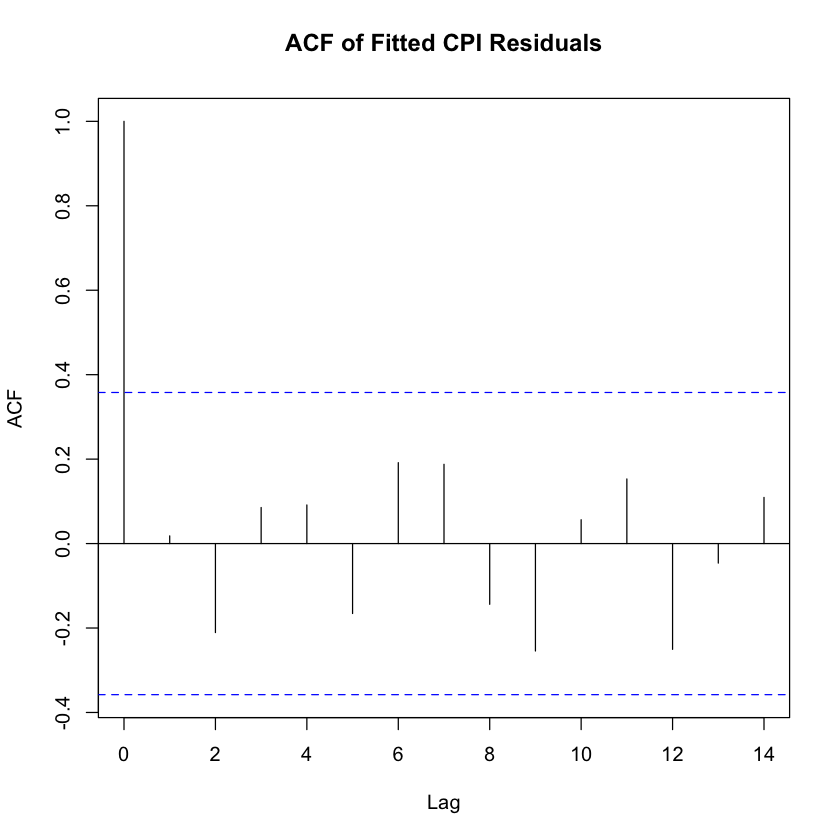

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.4825422,1.937615,1.467712,-7.103242,61.31547,0.94439,0.01816394


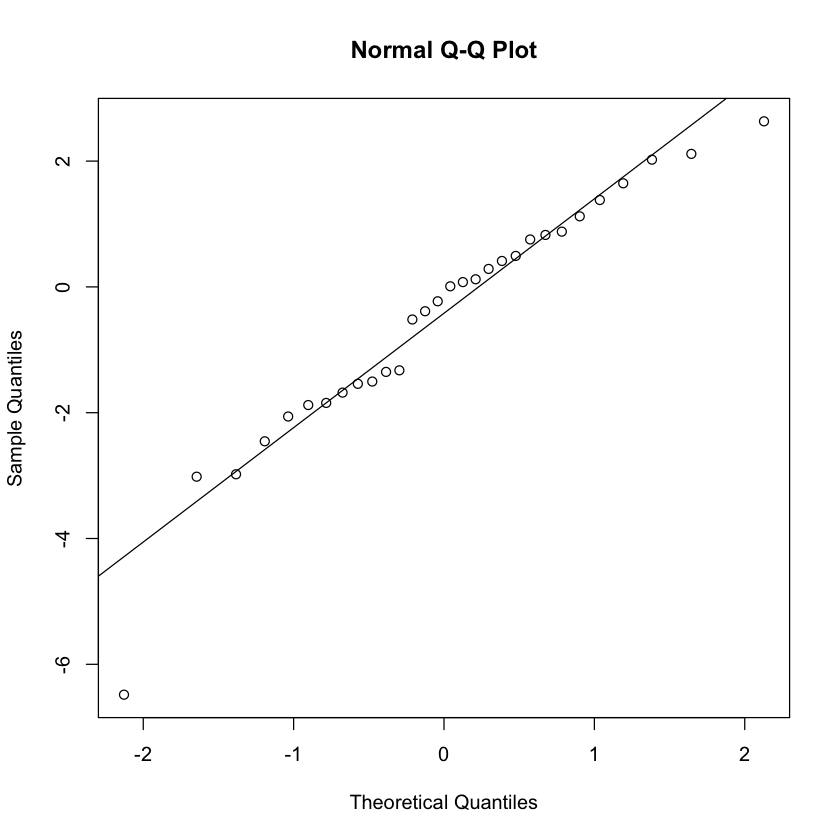

In [17]:
Box.test(resid(fit_2),type="Ljung",lag=20,fitdf=3)
acf(fit_2$residuals, main='ACF of Fitted CPI Residuals')
qqnorm(fit_2$residuals)
qqline(fit_2$residuals)

accuracy(fit_2)

Predict next 11 observations from 2021-2031

     Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
2021       2.281277 -0.2890311 4.851586 -1.649670 6.212225
2022       2.281277 -0.5789435 5.141498 -2.093053 6.655607
2023       2.281277 -0.8420609 5.404615 -2.495456 7.058011
2024       2.281277 -1.0846727 5.647227 -2.866499 7.429053
2025       2.281277 -1.3109362 5.873491 -3.212539 7.775094
2026       2.281277 -1.5237688 6.086323 -3.538038 8.100593
2027       2.281277 -1.7253115 6.287866 -3.846271 8.408826
2028       2.281277 -1.9171905 6.479745 -4.139725 8.702280
2029       2.281277 -2.1006755 6.663230 -4.420341 8.982896
2030       2.281277 -2.2767802 6.839335 -4.689670 9.252225
2031       2.281277 -2.4463295 7.008884 -4.948973 9.511528

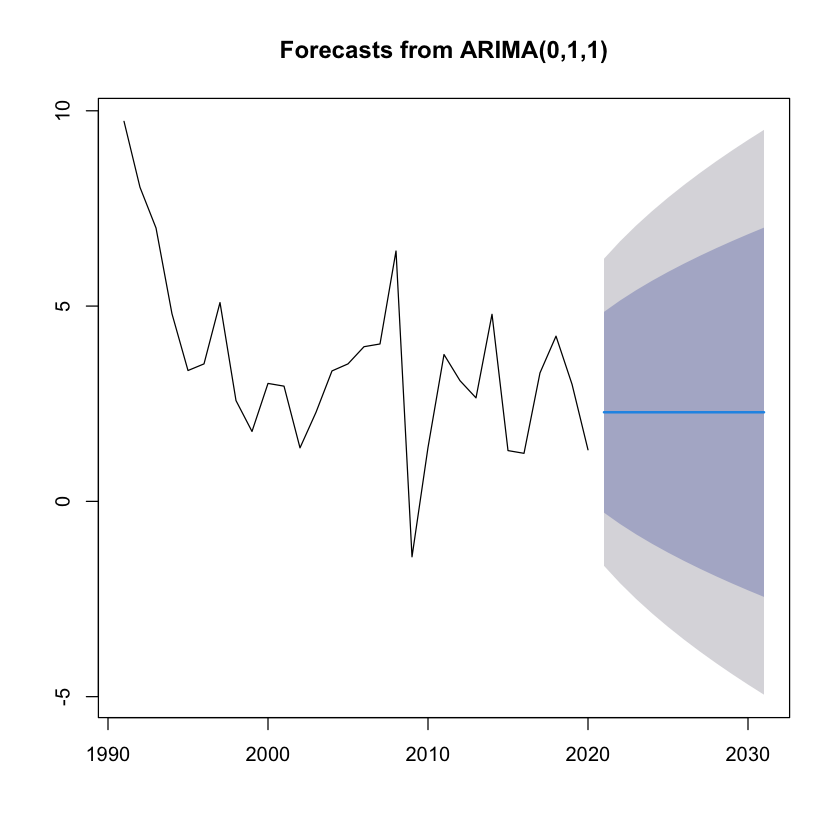

In [18]:
forc<-forecast(fit_2, 11)
plot(forecast(fit_2, 11))

forc

Import, Tidy and Check Household Savings Data

In [19]:
HSdata<-read.csv("Economic Impact Data/Household.csv") 

colnames(HSdata)<-c("Time","Household Savings Rate")
HSdata$`Household Savings Rate` <- as.numeric(HSdata$`Household Savings Rate`)

Create a time series, plot the ACF and PCF of the time series and then fit to an ARIMA(0,0,0) model with a non-zero mean

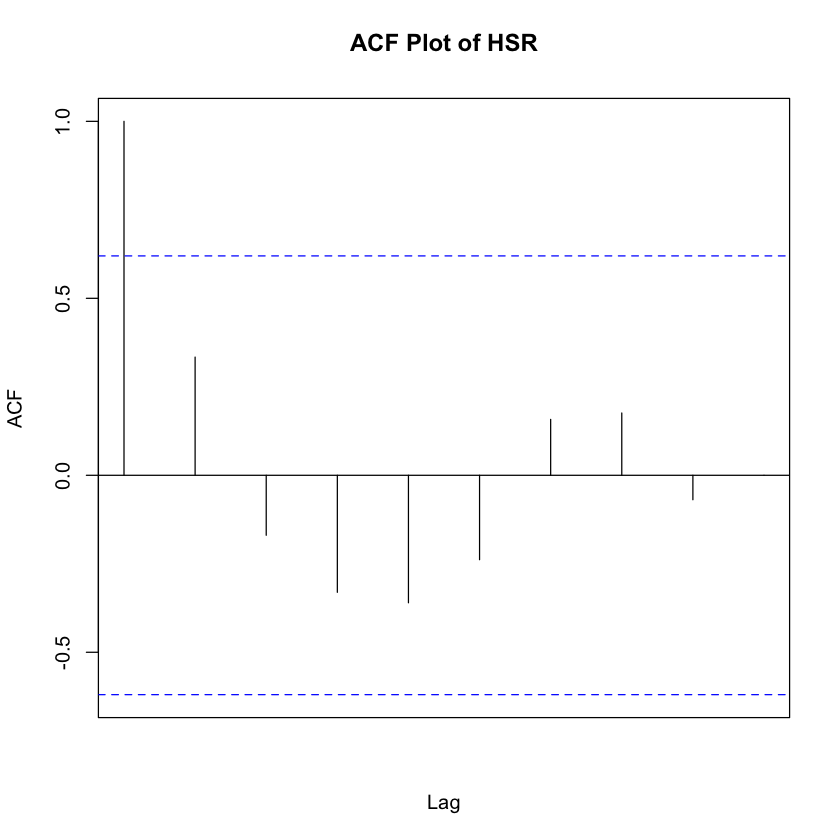

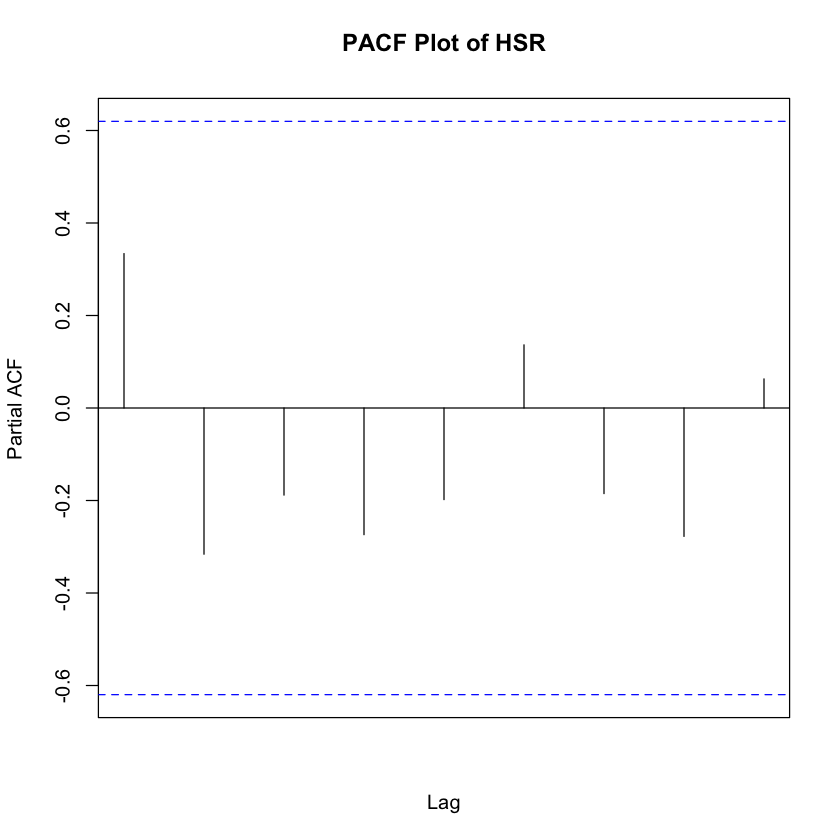

In [20]:
HS_R <- ts(HSdata$`Household Savings Rate`, frequency = 1, start = c(2011))

acf(HS_R, plot = T, main = "ACF Plot of HSR", xaxt="n")
pacf(HS_R, plot = T, main = "PACF Plot of HSR", xaxt="n")

fit_hs_r<-auto.arima(HS_R)

Plot fitted model

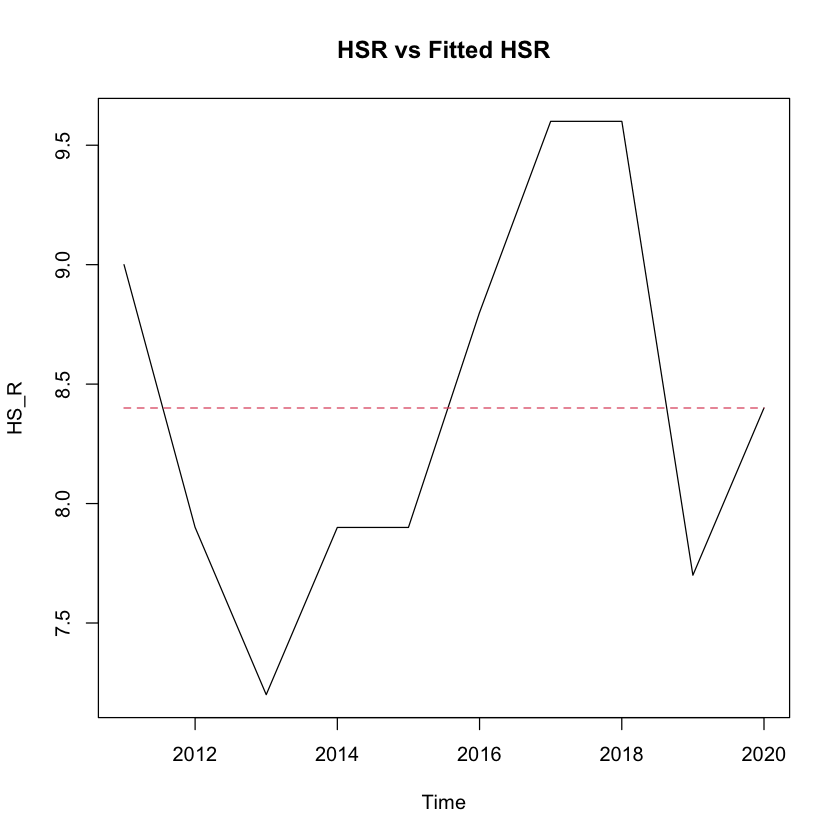

In [21]:
residuals_hs_r <- residuals(fit_hs_r)
fitted_hs_r <- HS_R - residuals_hs_r
ts.plot(HS_R, main="HSR vs Fitted HSR")
points(fitted_hs_r, type = "l", col = 2, lty = 2)

Testing accuracy and residuals


	Box-Ljung test

data:  resid(fit_hs_r)
X-squared = 7.7503, df = 4, p-value = 0.1012


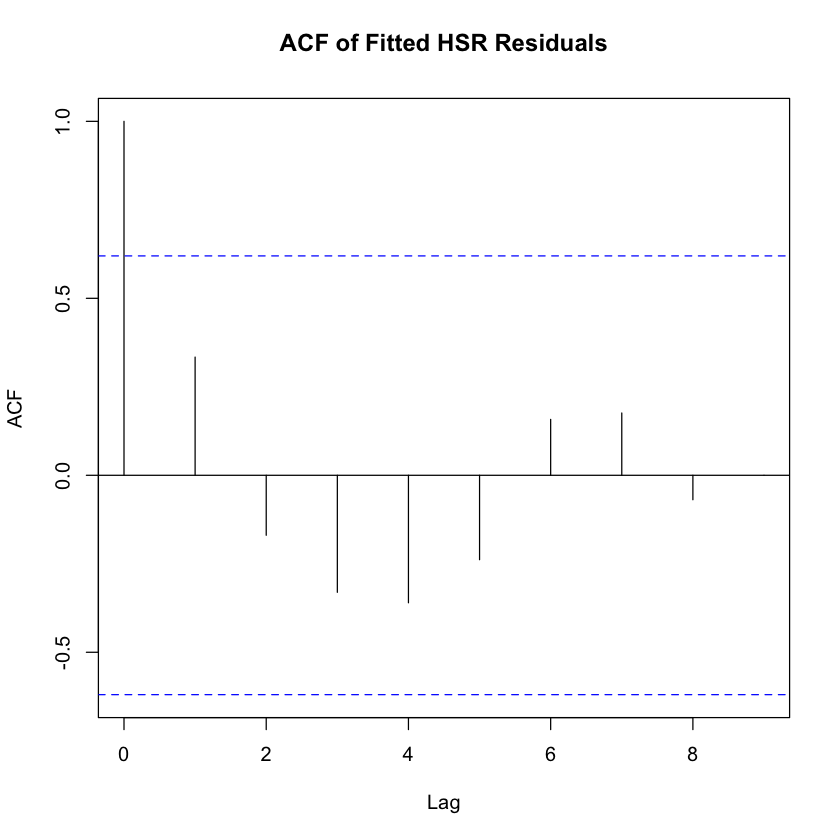

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.776476e-16,0.7797435,0.68,-0.8532796,8.095704,0.9,0.3338816


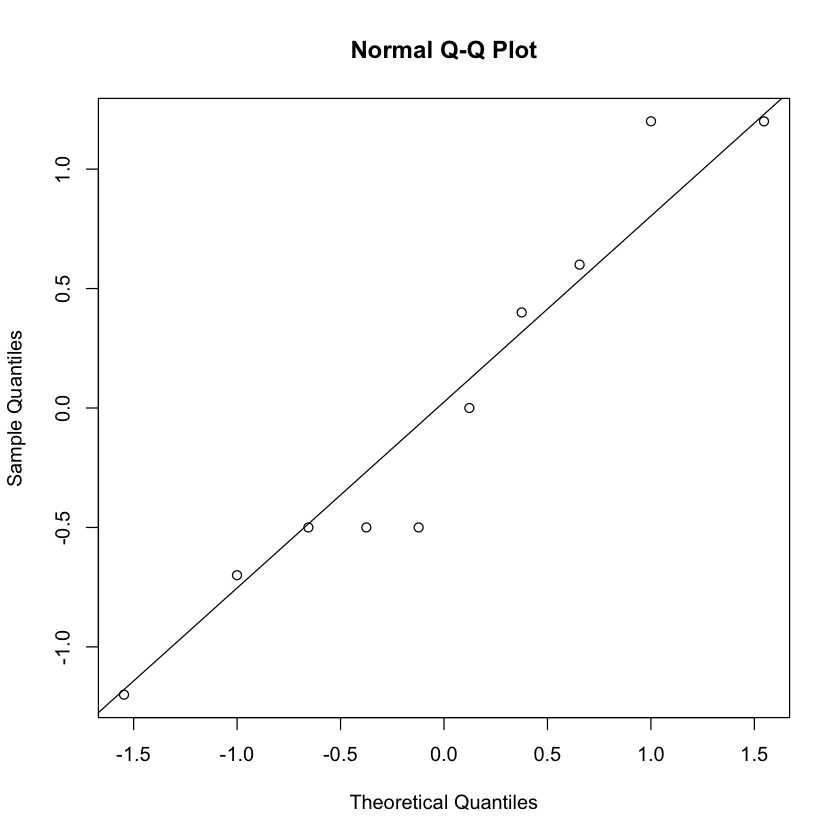

In [22]:
Box.test(resid(fit_hs_r),type="Ljung",lag=5,fitdf=1)
acf(fit_hs_r$residuals, main="ACF of Fitted HSR Residuals")
qqnorm(fit_hs_r$residuals)
qqline(fit_hs_r$residuals)

accuracy(fit_hs_r)

Predict next 11 observations

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021            8.4 7.346665 9.453335 6.789063 10.01094
2022            8.4 7.346665 9.453335 6.789063 10.01094
2023            8.4 7.346665 9.453335 6.789063 10.01094
2024            8.4 7.346665 9.453335 6.789063 10.01094
2025            8.4 7.346665 9.453335 6.789063 10.01094
2026            8.4 7.346665 9.453335 6.789063 10.01094
2027            8.4 7.346665 9.453335 6.789063 10.01094
2028            8.4 7.346665 9.453335 6.789063 10.01094
2029            8.4 7.346665 9.453335 6.789063 10.01094
2030            8.4 7.346665 9.453335 6.789063 10.01094
2031            8.4 7.346665 9.453335 6.789063 10.01094

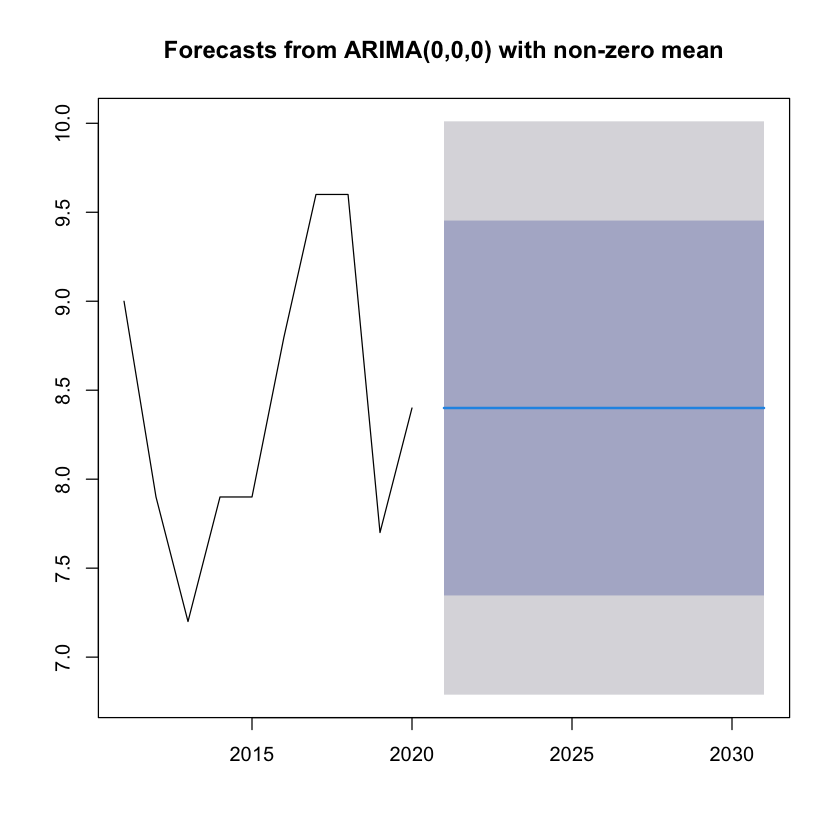

In [23]:
forc_hs_r<-forecast(fit_hs_r, 11)
plot(forecast(fit_hs_r, 11))

forc_hs_r

Import, Tidy and Check Healthcare Spending Data

In [24]:
Healthdata<-read.csv("Economic Impact Data/Healthcare.csv") # Healthcare.csv

colnames(Healthdata)<-c("Time","Healthcare spending per capita")
Healthdata$`Healthcare spending per capita` <- as.numeric(Healthdata$`Healthcare spending per capita`)

Create a time series, plot the ACF and PCF of the time series and then fit to an ARIMA(0,1,0) model with drift

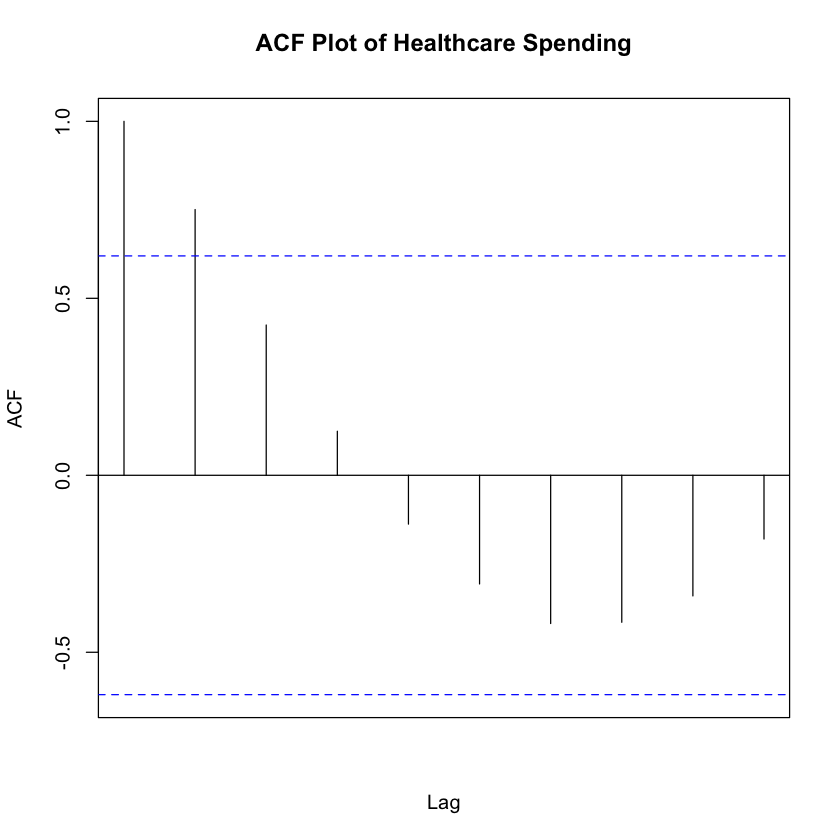

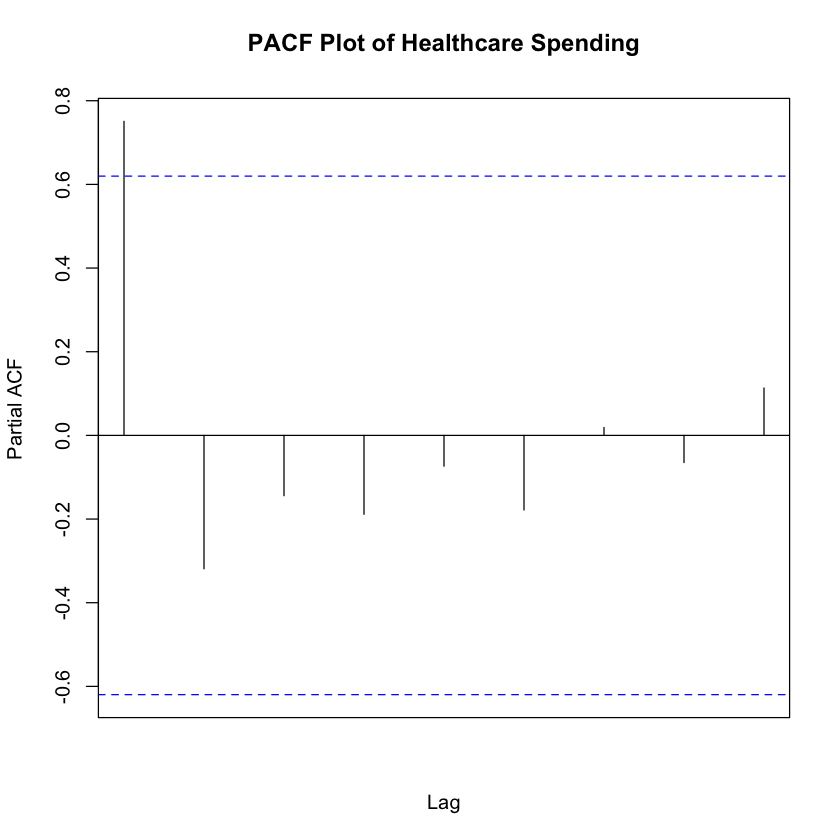

In [25]:
# time series
Health_R <- ts(Healthdata$`Healthcare spending per capita`, frequency = 1, start = c(2011))

# acf and pacf
acf(Health_R, plot = T, main = "ACF Plot of Healthcare Spending", xaxt="n")
pacf(Health_R, plot = T, main = "PACF Plot of Healthcare Spending", xaxt="n")

# arima(0,1,0) with drirft
fit_health_r<-auto.arima(Health_R)

Plot the fitted model

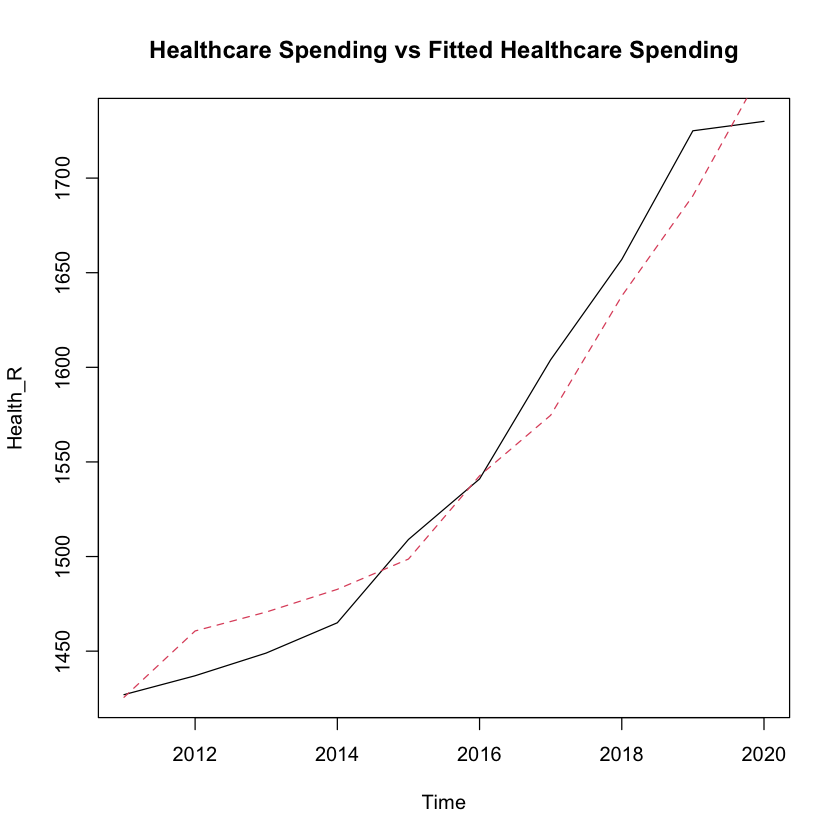

In [26]:
residuals_health_r <- residuals(fit_health_r)
fitted_health_r <- Health_R - residuals_health_r
ts.plot(Health_R, main="Healthcare Spending vs Fitted Healthcare Spending")
points(fitted_health_r, type = "l", col = 2, lty = 2)

Test accuracy and residuals


	Box-Ljung test

data:  resid(fit_health_r)
X-squared = NA, df = 9, p-value = NA


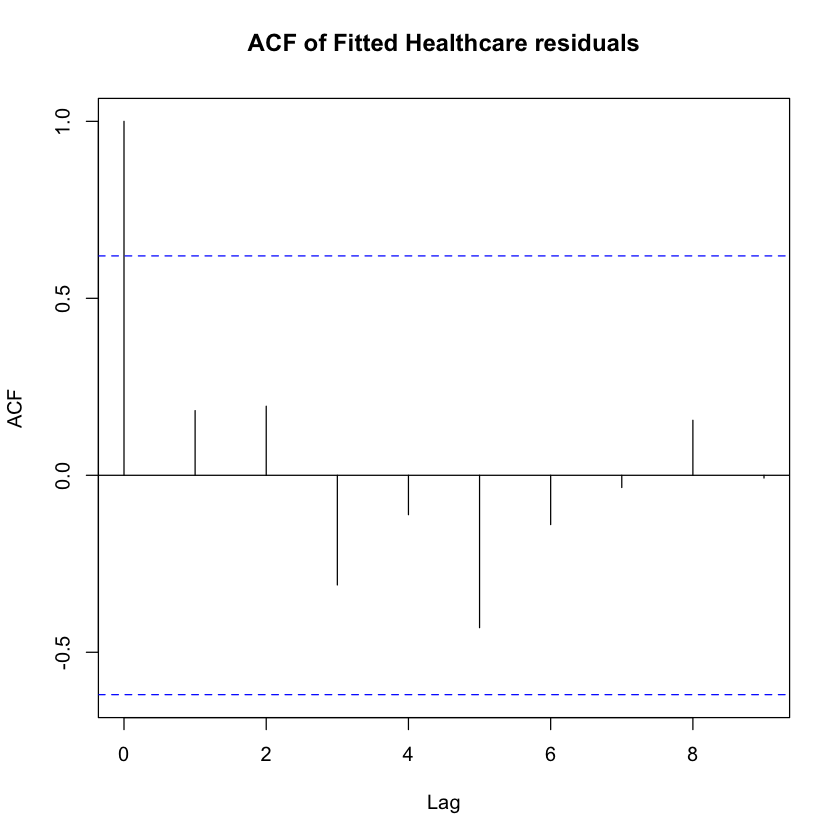

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.1393333,21.65165,18.806,-0.03450495,1.188162,0.5585941,0.1827245


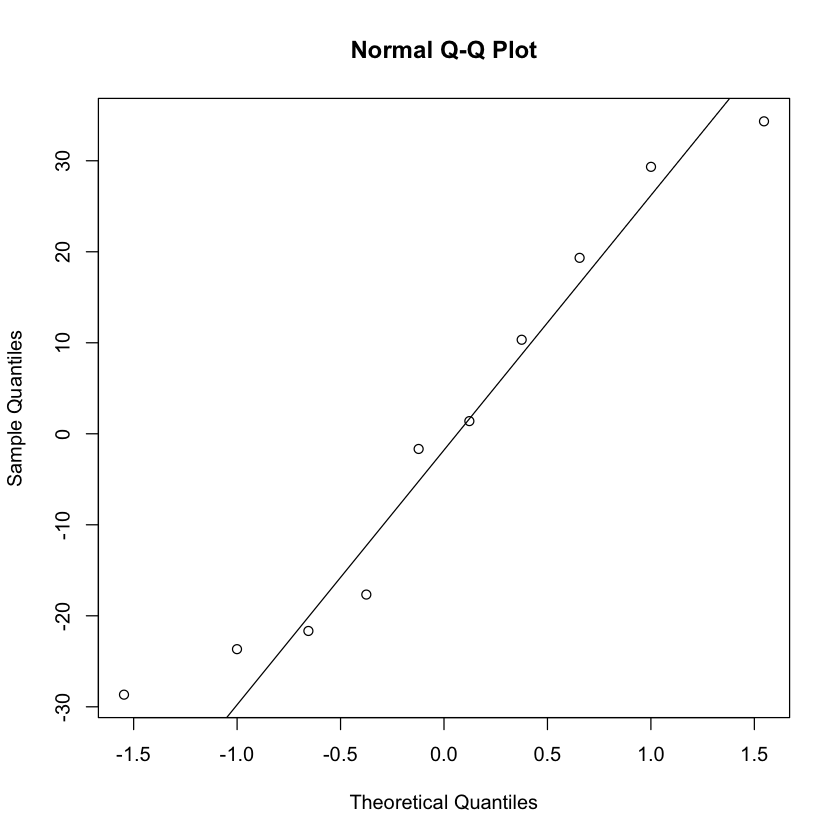

In [27]:
Box.test(resid(fit_health_r),type="Ljung",lag=10,fitdf=1)
acf(fit_health_r$residuals, main="ACF of Fitted Healthcare residuals")
qqnorm(fit_health_r$residuals)
qqline(fit_health_r$residuals)

accuracy(fit_health_r)

Predict next 11 observations

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021       1763.667 1732.644 1794.690 1716.221 1811.112
2022       1797.333 1753.460 1841.206 1730.235 1864.431
2023       1831.000 1777.267 1884.733 1748.822 1913.178
2024       1864.667 1802.621 1926.712 1769.776 1959.557
2025       1898.333 1828.964 1967.703 1792.242 2004.424
2026       1932.000 1856.010 2007.990 1815.783 2048.217
2027       1965.667 1883.588 2047.746 1840.138 2091.195
2028       1999.333 1911.587 2087.079 1865.137 2133.529
2029       2033.000 1939.931 2126.069 1890.664 2175.336
2030       2066.667 1968.564 2164.770 1916.631 2216.702
2031       2100.333 1997.442 2203.225 1942.975 2257.692

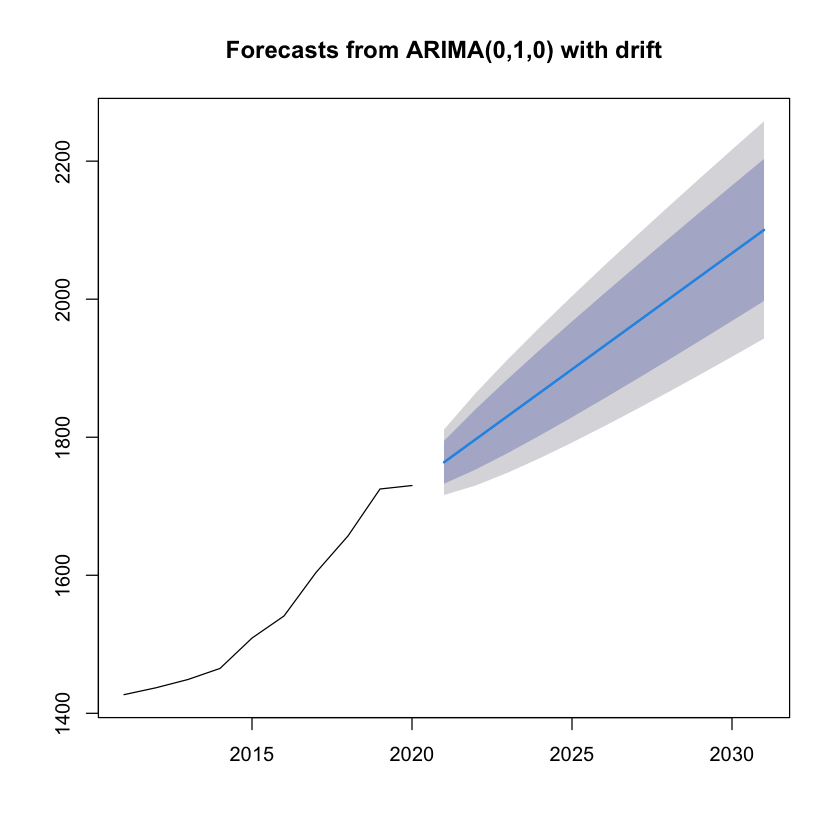

In [28]:
forc_health_r<-forecast(fit_health_r, 11)
plot(forecast(fit_health_r, 11))

forc_health_r

Import Population Data

In [29]:
population<-read.csv("Economic Impact Data/Population.csv") 
population$Population<-as.numeric(population$Population)

Create a time series, plot the ACF and PCF of the time series and then fit to an ARIMA(0,1,0) model with drift

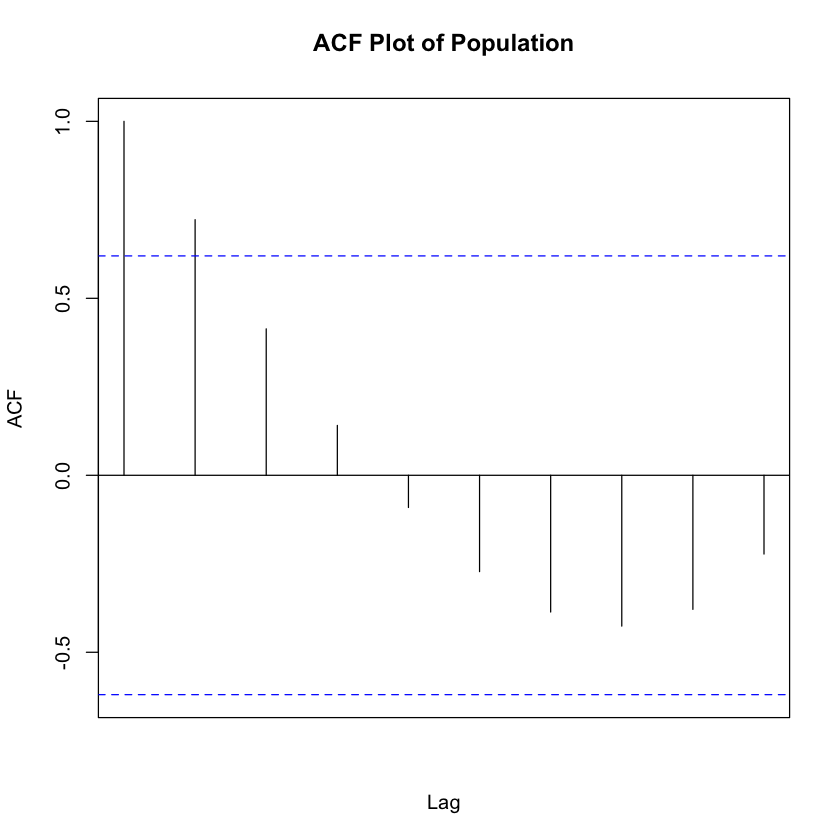

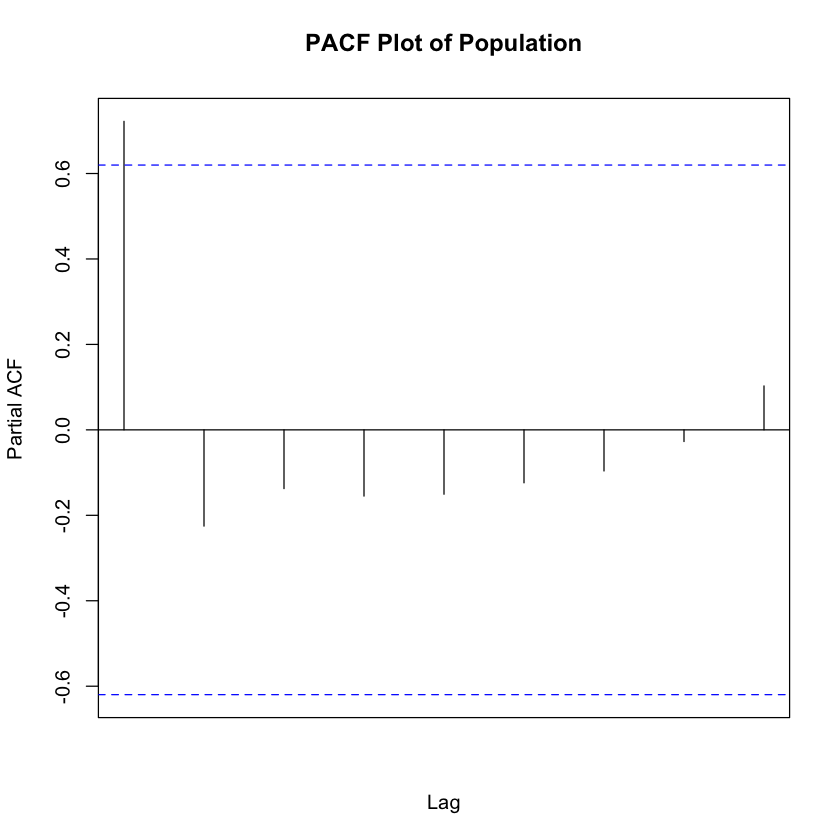

In [30]:
# time series
pop <- ts(population$Population, frequency = 1, start = c(2011))

# acf and pacf
acf(pop, plot = T, main = "ACF Plot of Population", xaxt="n")
pacf(pop, plot = T, main = "PACF Plot of Population", xaxt="n")

# arima(0,1,0) with drift
fit_pop<-auto.arima(pop)

Plot fitted model

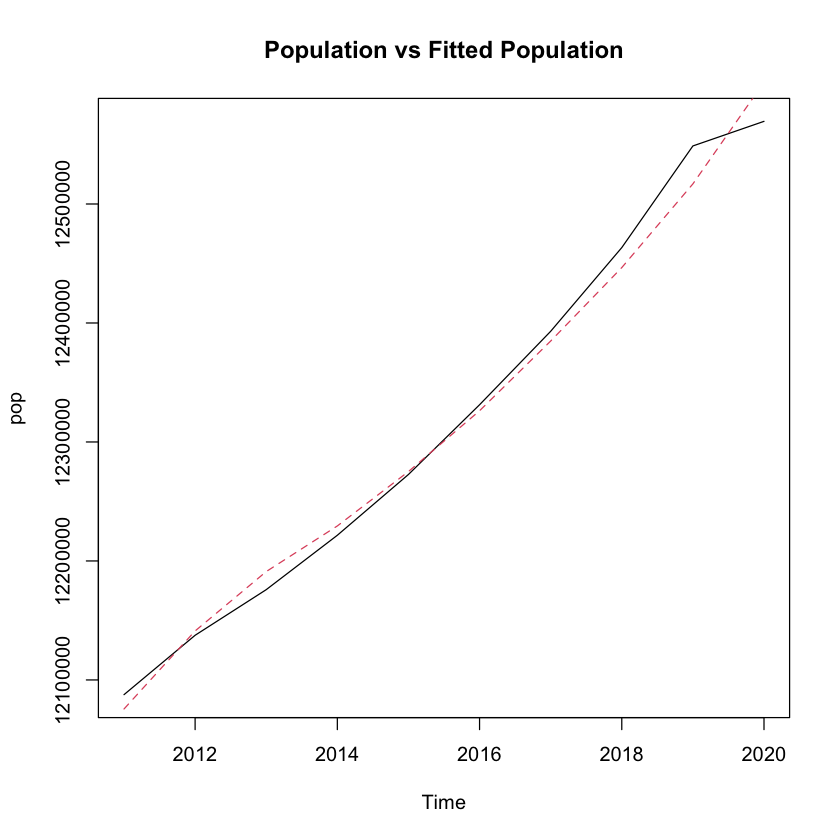

In [31]:
residuals_pop <- residuals(fit_pop)
fitted_pop <- pop - residuals_pop
ts.plot(pop, main="Population vs Fitted Population")
points(fitted_pop, type = "l", col = 2, lty = 2)

Test accuracy and residuals


	Box-Ljung test

data:  resid(fit_pop)
X-squared = 0.35796, df = 1, p-value = 0.5496


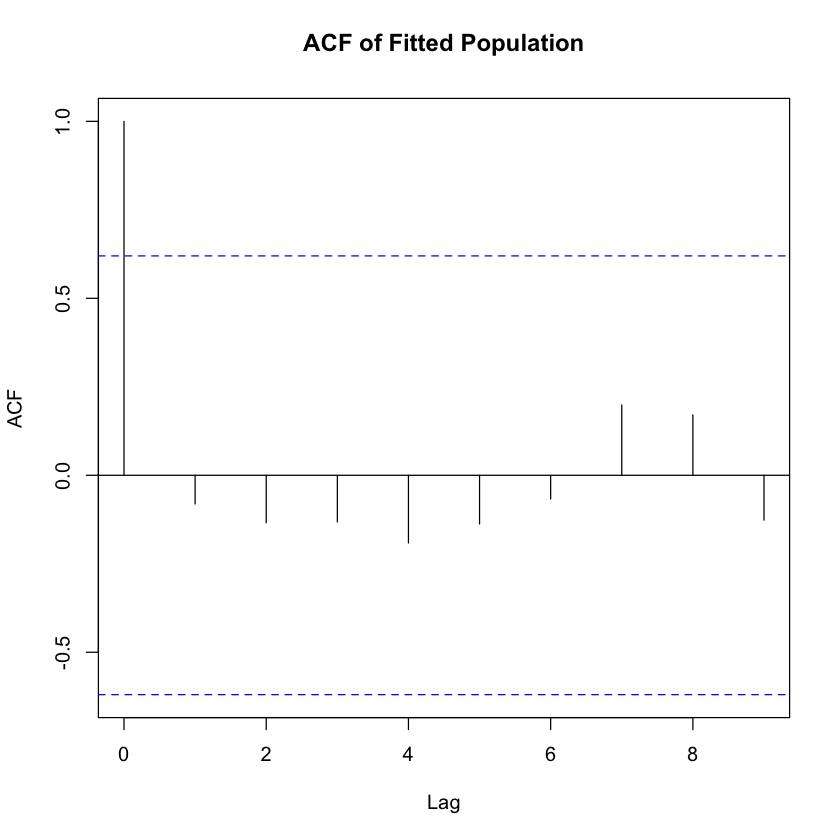

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1203.408,17111.64,13594.45,0.009564011,0.1095803,0.2539195,-0.08115007


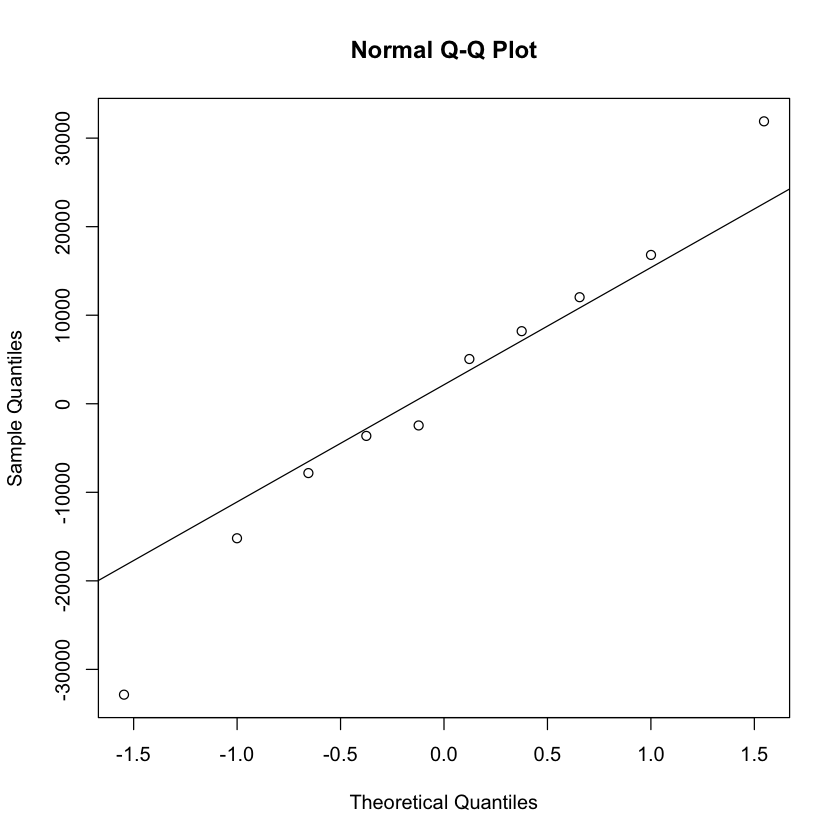

In [32]:
Box.test(resid(fit_pop),type="Ljung",lag=2,fitdf=1)
acf(fit_pop$residuals, main="ACF of Fitted Population")
qqnorm(fit_pop$residuals)
qqline(fit_pop$residuals)

accuracy(fit_pop)

Preduct the next 11 observations

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021       12623010 12598493 12647528 12585514 12660507
2022       12676549 12641875 12711222 12623520 12729577
2023       12730087 12687621 12772554 12665141 12795034
2024       12783626 12734590 12832662 12708632 12858619
2025       12837164 12782341 12891988 12753319 12921010
2026       12890703 12830646 12950759 12798855 12982551
2027       12944241 12879373 13009109 12845034 13043448
2028       12997780 12928433 13067127 12891722 13103837
2029       13051318 12977764 13124872 12938827 13163809
2030       13104856 13027324 13182389 12986281 13223432
2031       13158395 13077078 13239711 13034032 13282758

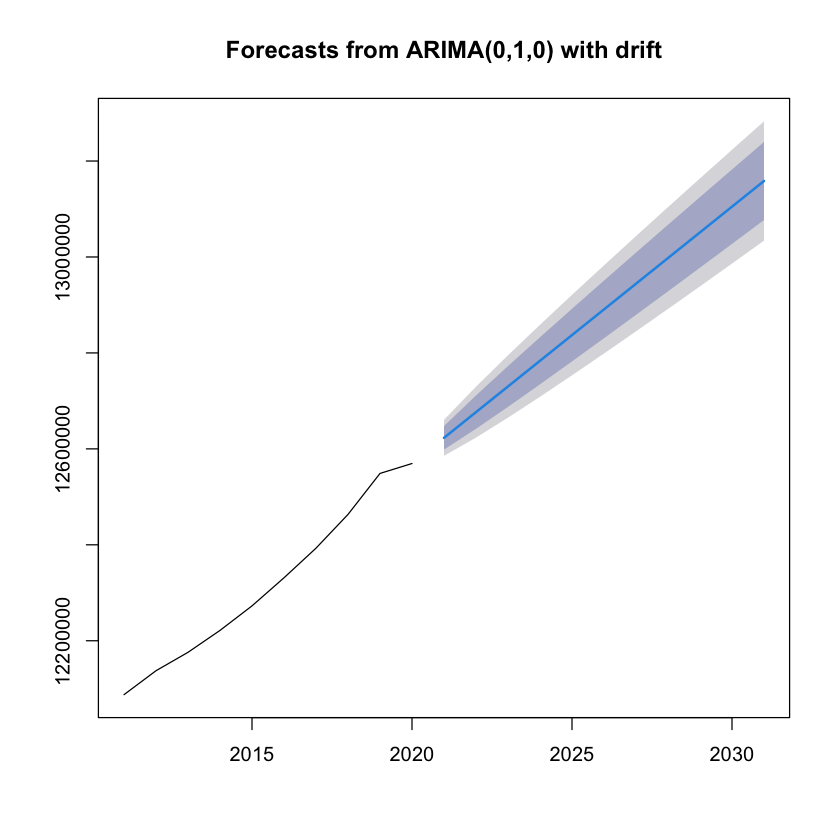

In [33]:
forc_pop<-forecast(fit_pop, 11)
plot(forecast(fit_pop, 11))

forc_pop

Import, tidy and check GDP data (for time series)

In [36]:
# import data
GDPdata<-read.csv("Economic Impact Data/GDP.csv") 

# make data numeric
GDPRarita<-GDPdata[,c(1,5)]
colnames(GDPRarita)<-c("Time","GDP per capita")
GDPRarita$`GDP per capita` <- as.numeric(GDPRarita$`GDP per capita`)

Create a time series, plot the ACF and PCF of the time series and then fit to an ARIMA(0,1,0) model with drift

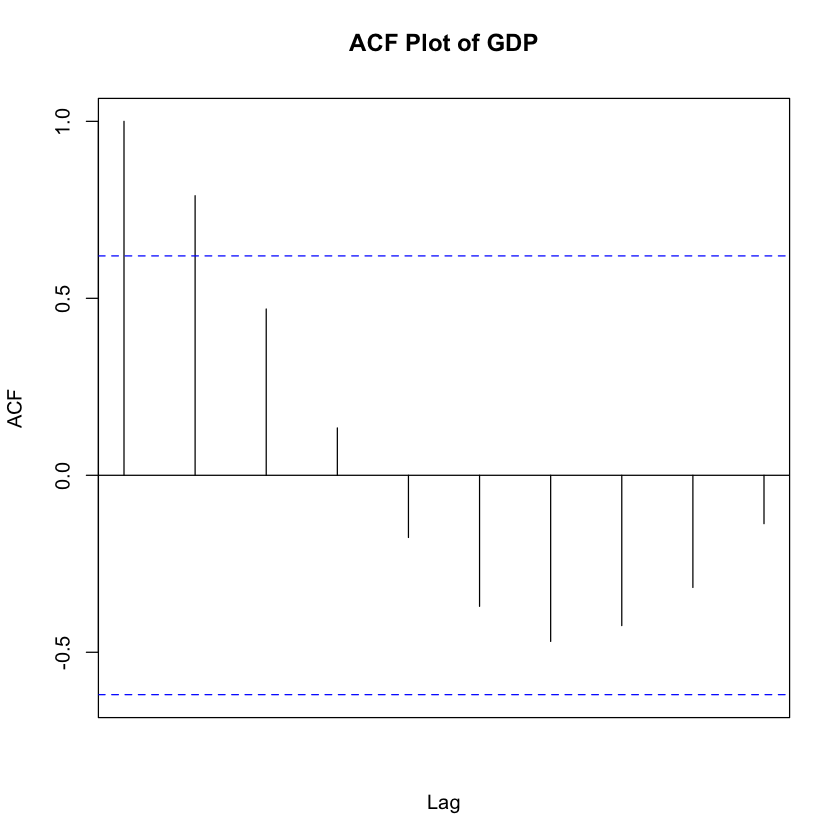

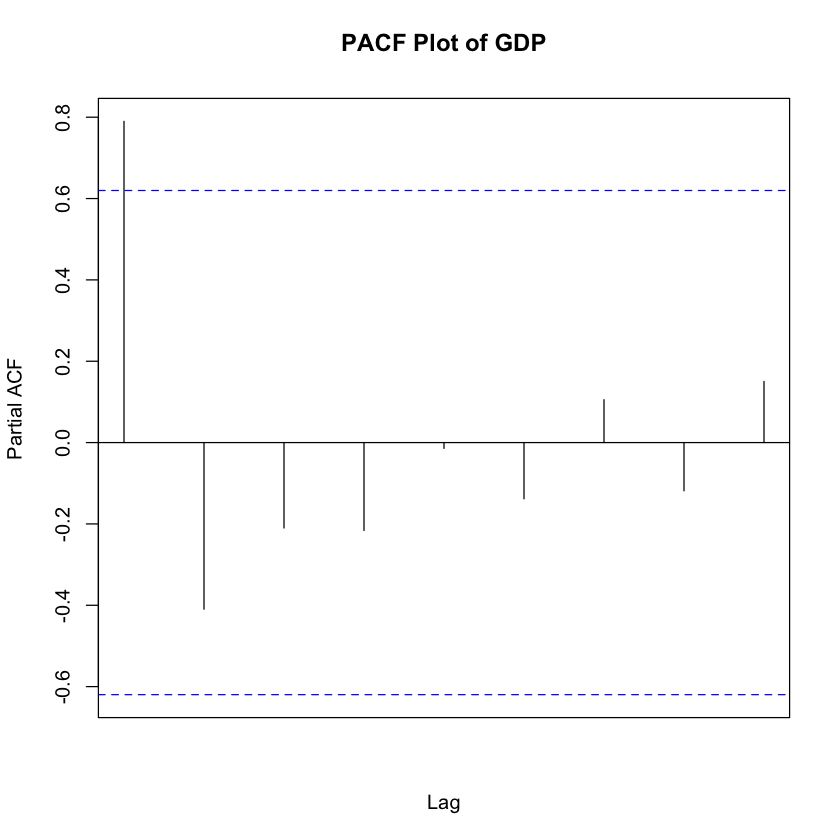

In [37]:
GDP_R <- ts(GDPRarita$`GDP per capita`, frequency = 1, start = c(2011))

acf(GDP_R, plot = T, main = "ACF Plot of GDP", xaxt="n")
pacf(GDP_R, plot = T, main = "PACF Plot of GDP", xaxt="n")

fit_gdp_r<-auto.arima(GDP_R)

Plot fitted model

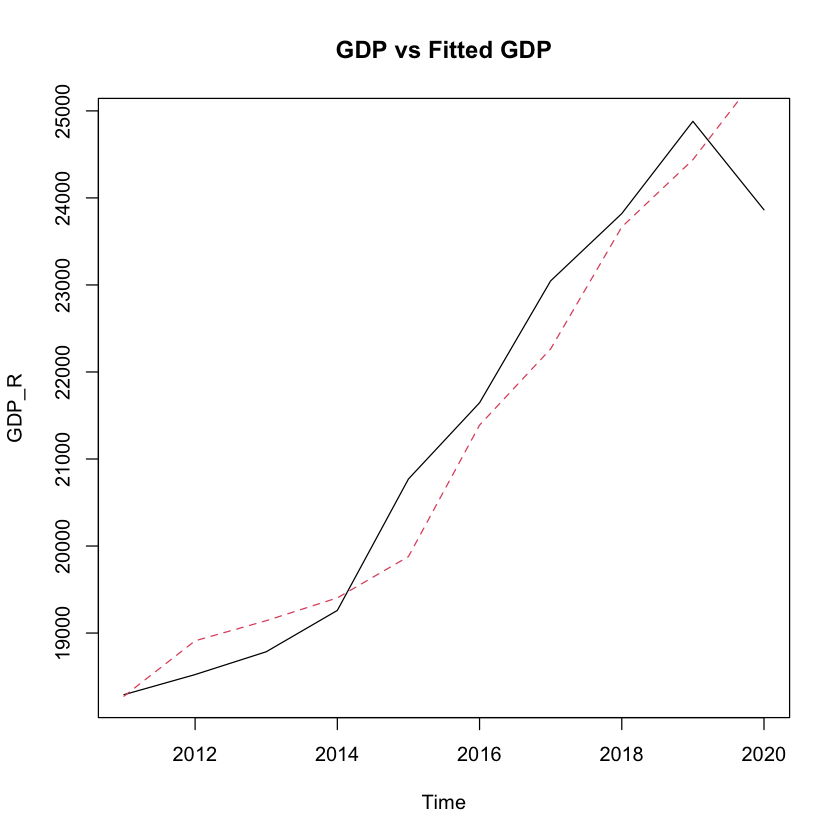

In [38]:
residuals_gdp_r <- residuals(fit_gdp_r)
fitted_gdp_r <- GDP_R - residuals_gdp_r
ts.plot(GDP_R, main="GDP vs Fitted GDP")
points(fitted_gdp_r, type = "l", col = 2, lty = 2)

Test accuracy and residuals 


	Box-Ljung test

data:  resid(fit_gdp_r)
X-squared = 2.3246, df = 3, p-value = 0.5078


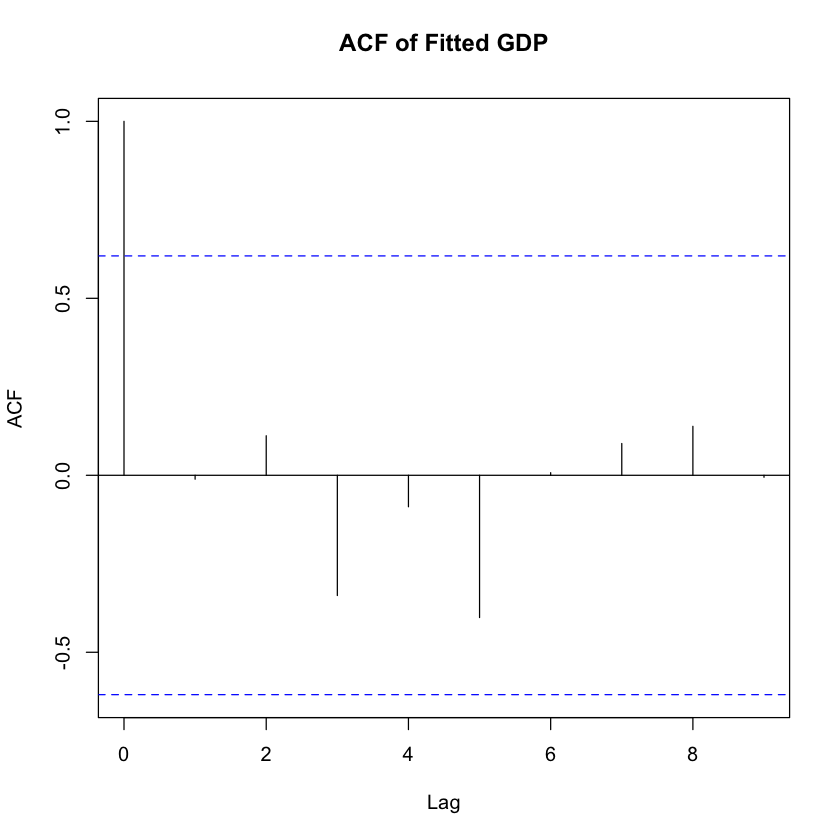

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.767299,683.0218,506.7673,-0.02127777,2.298444,0.5997246,-0.01099739


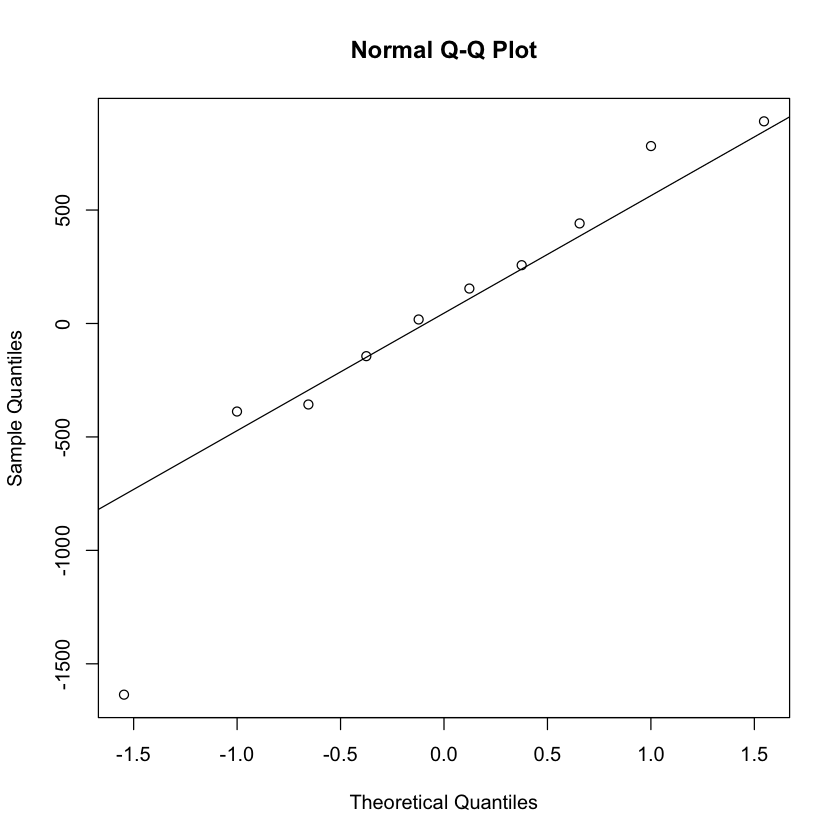

In [39]:
Box.test(resid(fit_gdp_r),type="Ljung",lag=4,fitdf=1)
acf(fit_gdp_r$residuals, main="ACF of Fitted GDP")
qqnorm(fit_gdp_r$residuals)
qqline(fit_gdp_r$residuals)

accuracy(fit_gdp_r)

Predict next 11 observations

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2021          24482 23503.35 25460.65 22985.29 25978.71
2022          25101 23716.99 26485.01 22984.33 27217.67
2023          25720 24024.94 27415.06 23127.62 28312.38
2024          26339 24381.71 28296.29 23345.58 29332.42
2025          26958 24769.68 29146.32 23611.25 30304.75
2026          27577 25179.82 29974.18 23910.82 31243.18
2027          28196 25606.75 30785.25 24236.08 32155.92
2028          28815 26046.97 31583.03 24581.66 33048.34
2029          29434 26498.06 32369.94 24943.87 33924.13
2030          30053 26958.25 33147.75 25319.99 34786.01
2031          30672 27426.20 33917.80 25707.97 35636.03

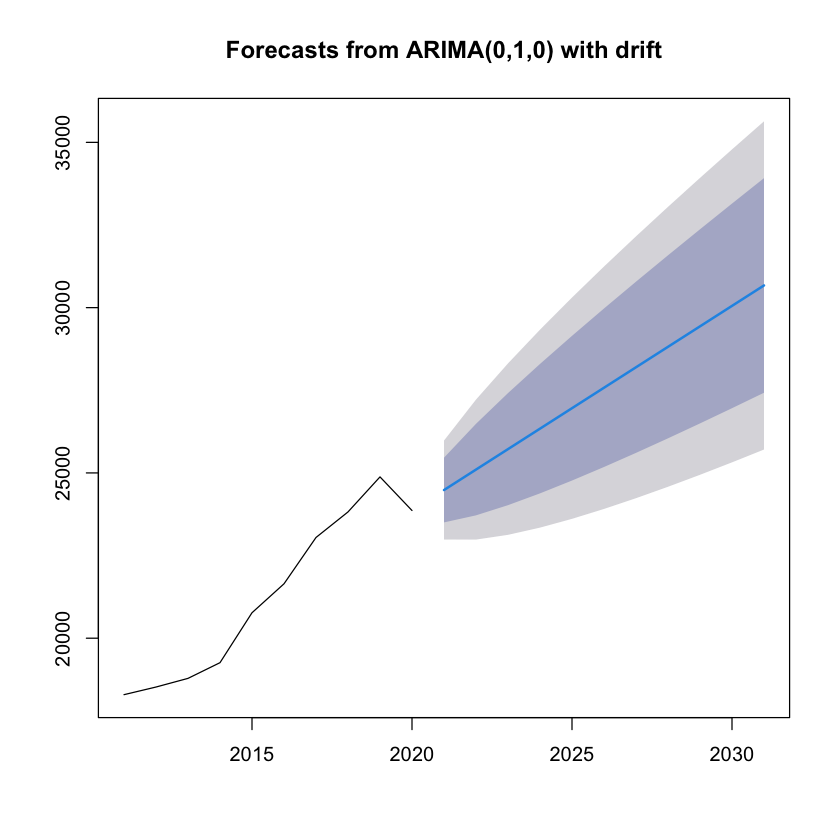

In [40]:
forc_gdp_r<-forecast(fit_gdp_r, 11)
plot(forecast(fit_gdp_r, 11))

forc_gdp_r

Import Data and determine correlation between variables

In [46]:

# import data for rarita from 2011-2022
Rarita<-read.csv("Economic Impact Data/Rarita_train.csv") # Rarita_train.csv

# import data for rarita from 2022-2031 using data from forcasted time series and revenue and expenses
Rarita_predict<-read.csv("Economic Impact Data/Rarita_predict.csv") # Rarita_predict.csv

Rarita_completed<-Rarita


Partition data into a training and test set


In [47]:
set.seed(2)
dt = sort(sample(nrow(Rarita_completed), nrow(Rarita_completed)*.7))
train<-Rarita_completed[dt,]
test<-Rarita_completed[-dt,]

Fit model using selected variables

In [48]:
# fit model using selected variables
fit.train=lm(GDP~Year+Healthcare+Profit,data=train)

pred.train.GDP<-predict(fit.train,newdata = test)
predict(fit.train,newdata=test,interval='confidence')

,fit,lwr,upr
2,18673.40,17944.94,19401.87
3,19130.77,18536.53,19725.01
8,22918.82,22332.16,23505.47


Accuracy of model and relevant statistics

In [49]:
# accuracy of model and stats
summary(fit.train)

AIC(fit.train)
BIC(fit.train)

predictions <- fit.train %>% predict(Rarita_completed)
data.frame(
  R2 = R2(predictions, Rarita_completed$GDP),
  RMSE = RMSE(predictions, Rarita_completed$GDP),
  MAE = MAE(predictions, Rarita_completed$GDP)
)

glance(fit.train)


Call:
lm(formula = GDP ~ Year + Healthcare + Profit, data = train)

Residuals:
      1       4       5       6       7       9      10 
  46.53 -386.60  195.75  322.65 -126.57   11.17  -62.93 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -4.350e+05  3.223e+05  -1.350   0.2699  
Year         2.141e+02  1.630e+02   1.313   0.2804  
Healthcare   1.474e+01  4.154e+00   3.549   0.0381 *
Profit       6.519e+01  1.646e+01   3.960   0.0287 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 323.6 on 3 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9821 
F-statistic: 110.5 on 3 and 3 DF,  p-value: 0.001437


[1] 104.8473

[1] 104.5769

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.9802588,356.1557,254.9569


ERROR: Error in glance(fit.train): could not find function "glance"


Fit the full model using the entire training data set, then predict GDP for 2021-2031

In [50]:
# fit full model
fit=lm(GDP~Year+Healthcare+Profit,data=Rarita_completed)

summary(fit)

# predicting 
set.seed(2)
pred.GDP <- predict(fit, newdata=Rarita_predict)

pred.GDP.df <- as.data.frame(pred.GDP)

pred.GDP.df


Call:
lm(formula = GDP ~ Year + Healthcare + Profit, data = Rarita_completed)

Residuals:
    Min      1Q  Median      3Q     Max 
-414.31 -247.24  -89.34  195.36  697.24 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -4.451e+05  3.983e+05  -1.118   0.3065  
Year         2.185e+02  2.016e+02   1.084   0.3200  
Healthcare   1.574e+01  5.214e+00   3.020   0.0234 *
Profit       5.659e+01  2.027e+01   2.792   0.0315 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 417.9 on 6 degrees of freedom
Multiple R-squared:  0.9814,	Adjusted R-squared:  0.9722 
F-statistic: 105.7 on 3 and 6 DF,  p-value: 1.39e-05


,pred.GDP
,<dbl>
1,25186.91
2,24621.03
3,25807.09
4,27031.82
5,28279.63
6,29528.89
7,31605.40
8,33775.62
9,36195.24


Merge these datasets in order obtain a complete one

In [56]:
Complete <- cbind(Rarita_predict,pred.GDP.df)
summary(Complete)
Complete

GDP_tournament<-as.data.frame(cbind(Complete$Year,Complete$pred.GDP))
colnames(GDP_tournament)<-c("Time","GDP per capita")

Rarita_2020<-as.data.frame(cbind(Rarita_completed$Year,Rarita_completed$GDP))
colnames(Rarita_2020)<-c("Time","GDP per capita")


GDP_tourn<-as.data.frame(rbind(Rarita_2020,GDP_tournament))

      Year        Inflation       Household     Healthcare        Rev       
 Min.   :2021   Min.   :2.281   Min.   :8.4   Min.   :1764   Min.   :176.3  
 1st Qu.:2024   1st Qu.:2.281   1st Qu.:8.4   1st Qu.:1848   1st Qu.:241.5  
 Median :2026   Median :2.281   Median :8.4   Median :1932   Median :339.0  
 Mean   :2026   Mean   :2.281   Mean   :8.4   Mean   :1932   Mean   :359.9  
 3rd Qu.:2028   3rd Qu.:2.281   3rd Qu.:8.4   3rd Qu.:2016   3rd Qu.:459.9  
 Max.   :2031   Max.   :2.281   Max.   :8.4   Max.   :2100   Max.   :617.8  
      Exp            Profit           pred.GDP    
 Min.   :159.1   Min.   : -5.941   Min.   :24621  
 1st Qu.:235.5   1st Qu.: 13.744   1st Qu.:26419  
 Median :311.1   Median : 27.871   Median :29529  
 Mean   :303.0   Mean   : 56.861   Mean   :31170  
 3rd Qu.:368.7   3rd Qu.: 91.219   3rd Qu.:34985  
 Max.   :436.9   Max.   :180.906   Max.   :41933  

,Year,Inflation,Household,Healthcare,Rev,Exp,Profit,pred.GDP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021,2.281277,8.4,1763.667,176.3397,159.0545,17.285230,25186.91
2,2022,2.281277,8.4,1797.333,192.8776,198.8181,-5.940556,24621.03
3,2023,2.281277,8.4,1831.000,224.1533,222.3636,1.789700,25807.09
4,2024,2.281277,8.4,1864.667,258.9004,248.6974,10.202987,27031.82
5,2025,2.281277,8.4,1898.333,297.1743,278.1499,19.024443,28279.63
6,2026,2.281277,8.4,1932.000,338.9617,311.0903,27.871395,29528.89
7,2027,2.281277,8.4,1965.667,384.1701,332.8347,51.335375,31605.40
8,2028,2.281277,8.4,1999.333,432.6190,356.1635,76.455538,33775.62
9,2029,2.281277,8.4,2033.000,487.1790,381.1969,105.982141,36195.24


Plot GDP with tournament with a confidence interval

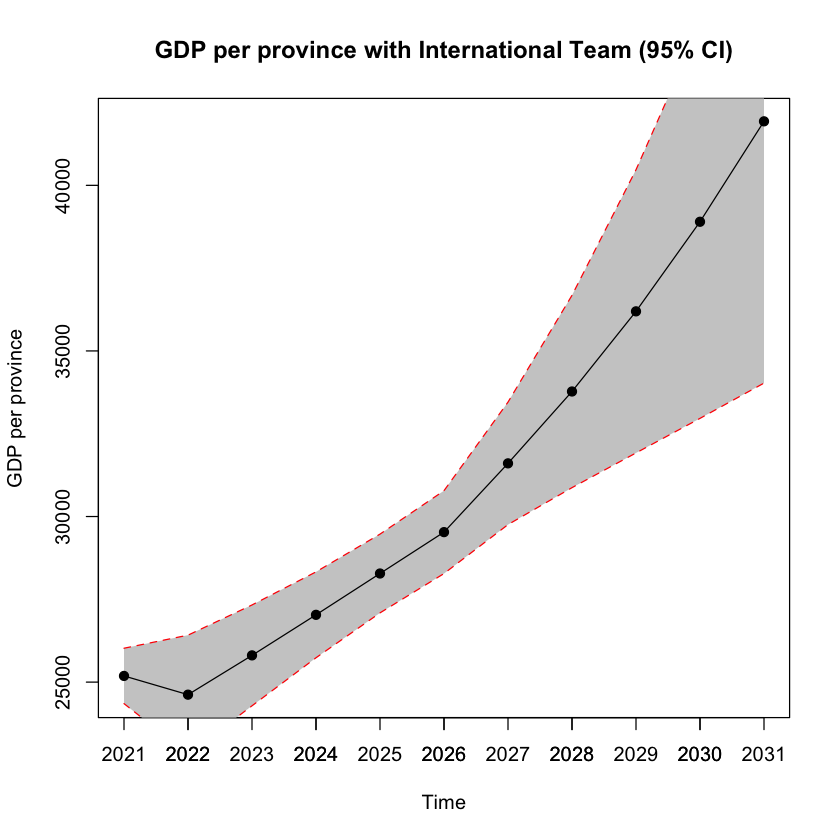

In [58]:


preds <- predict(fit, newdata = Rarita_predict, 
                 interval = 'confidence')


plot(GDP_tournament$Time, GDP_tournament$`GDP per capita`, type='l',col='black', lty = 1,pch=19,lwd=1, main='GDP per province with International Team (95% CI)',xlab='Time',ylab='GDP per province')
axis(1,seq(2021,2031,1))
polygon(c(rev(GDP_tournament$Time), GDP_tournament$Time), c(rev(preds[ ,3]), preds[ ,2]), col = 'grey80', border = NA)
lines(GDP_tournament$Time, preds[ ,3], lty = 'dashed', col = 'red')
lines(GDP_tournament$Time, preds[ ,2], lty = 'dashed', col = 'red')
lines(GDP_tournament$Time,GDP_tournament$`GDP per capita`,col='black',lty=1,pch=19,lwd=1)
points(GDP_tournament$Time,GDP_tournament$`GDP per capita`,lty = 1,pch=19,lwd=1)



Merge datasets for the GDP time series and use this to plot GDP without tournament with a confidence interval

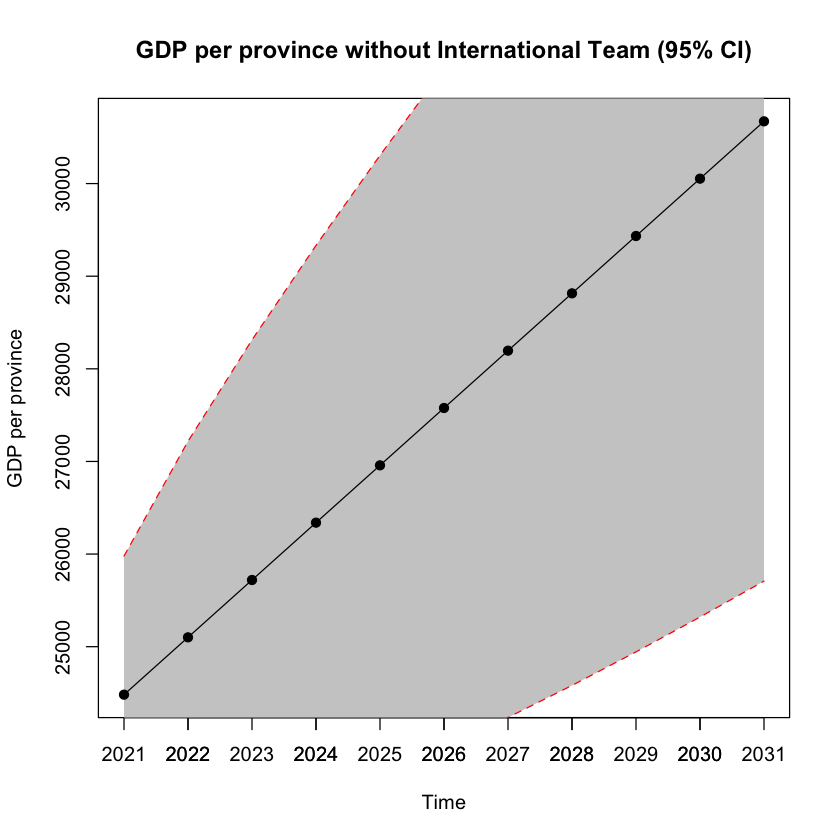

In [59]:
GDP_no_tournament<-as.data.frame(forc_gdp_r$mean)
Decade<-as.data.frame(Rarita_predict$Year)

GDP_no_tournament_1<-cbind(Decade,GDP_no_tournament)
colnames(GDP_no_tournament_1)<-c("Time","GDP per capita")

GDP_no_tourn<-as.data.frame(rbind(Rarita_2020,GDP_no_tournament_1))

GDP_no_tournament_confidence<-cbind(forc_gdp_r$mean,forc_gdp_r$lower,forc_gdp_r$upper)
GDP_no_tourn_conf<-as.data.frame(cbind(Decade,GDP_no_tournament_confidence))
GDP_no_tourn_conf1<-as.data.frame(cbind(GDP_no_tourn_conf$`Rarita_predict$Year`,GDP_no_tourn_conf$`forc_gdp_r$mean`,
                                        GDP_no_tourn_conf$`forc_gdp_r$lower.95%`,GDP_no_tourn_conf$`forc_gdp_r$upper.95%`))
colnames(GDP_no_tourn_conf1)<-c("Time","GDP per capita","Upper","Lower")


plot(GDP_no_tourn_conf1$Time, GDP_no_tourn_conf1$`GDP per capita`, type='l',col='black', lty = 1,pch=19,lwd=1, main='GDP per province without International Team (95% CI)',xlab='Time',ylab='GDP per province')
axis(1,seq(2021,2031,1))
polygon(c(rev(GDP_no_tourn_conf1$Time), GDP_no_tourn_conf1$Time), c(rev(GDP_no_tourn_conf1$Upper), GDP_no_tourn_conf1$Lower), col = 'grey80', border = NA)
lines(GDP_no_tourn_conf1$Time, GDP_no_tourn_conf1$Upper, lty = 'dashed', col = 'red')
lines(GDP_no_tourn_conf1$Time, GDP_no_tourn_conf1$Lower, lty = 'dashed', col = 'red')
lines(GDP_no_tourn_conf1$Time,GDP_no_tourn_conf1$`GDP per capita`,col='black',lty=1,pch=19,lwd=1)
points(GDP_no_tourn_conf1$Time,GDP_no_tourn_conf1$`GDP per capita`,lty = 1,pch=19,lwd=1)

Plot GDP without tournament against GDP with tournament


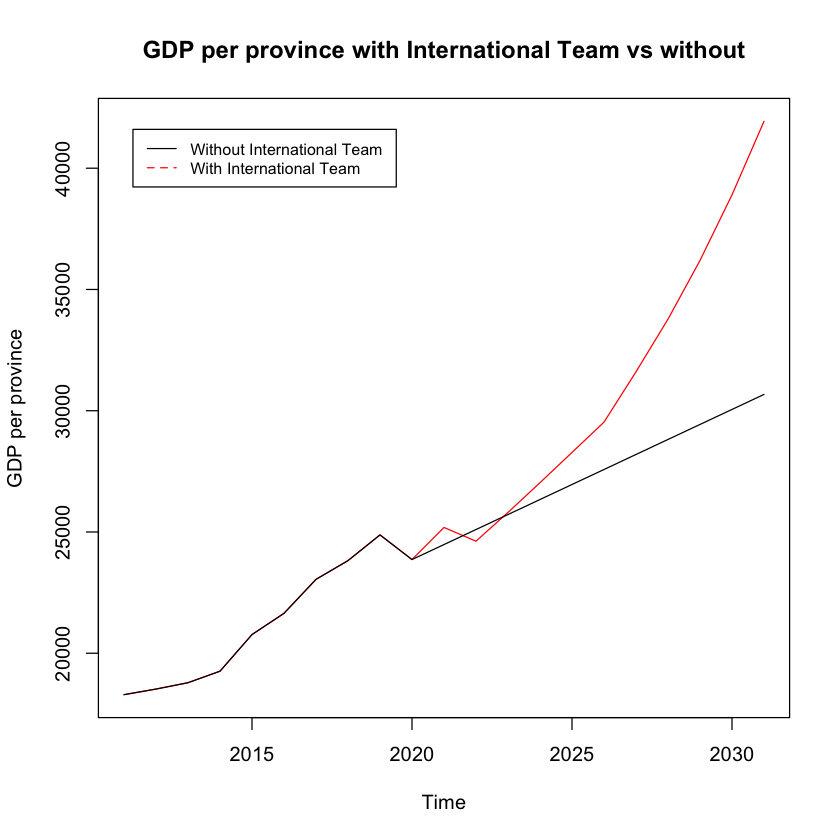

In [60]:
plot(GDP_tourn$Time, GDP_tourn$`GDP per capita`, type='l', col='red', lty = 1,pch=19,lwd=1, main='GDP per province with International Team vs without',xlab='Time',
     ylab = 'GDP per province')
lines(GDP_no_tourn$Time,GDP_no_tourn$`GDP per capita`,type='l',col='black',lty=1,pch=19,lwd=1)
legend(x="topleft",inset = 0.05, legend=c("Without International Team", "With International Team"),col=c("black", "red"), lty=1:2, cex=0.8)
